# Baltic Sea BioMed summer school: PROJECT WORK, DAY 1
This notebook contains analysis of RNA-seq data generated from human liver cancer cell line **[HEPG2](https://en.wikipedia.org/wiki/Hep_G2)**, that is commonly used model for liver toxicity. Cells have been treated with DMSO (control), PCB118 or PCB153 for 24 hours. PCB118 and PCB153 are **[polychlorinated biphenyls](https://en.wikipedia.org/wiki/Polychlorinated_biphenyl)**. RNA-seq libraries are produced from mRNAs, mapped to human genome hg38 and differential gene expression (DGE) is analyzed with **[DESeq2](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-014-0550-8)** and using DMSO as a reference.  

  **DAY 1:** We'll get familiar with the data and produce various common visualizations.  
  **DAY 2:** We'll do gene-set enrichment analysis (GSEA) and predict upstream transcription regulators using Lisa online tool. 

## 1. Load Libraries and import RNA-seq data
We start by loading necessary libraries for data visualizations and analyses.

In [1]:
## install libraries if not installed already
# install.packages("ggplot2")
# install.packages("ggrepel")
# install.packages("gridExtra")

## these come from bioconductor and you need to install BiocManager first 
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("ComplexHeatmap")
# BiocManager::install("clusterProfiler")
# BiocManager::install("enrichplot")

In [2]:
## load libraries
# these are needed for visualizations
library(ggplot2)
library(ComplexHeatmap)
library(ggrepel)
library(gridExtra)

# these are used in GSEA analysis
library(clusterProfiler)
library(enrichplot)

# these libraries contain pre-made color palettes - not necessary for this task but nice to know :)
# library(RColorBrewer) # display.brewer.all(), brewer.pal(n = 7, name = "RdYlBu")
# library(wesanderson) # color palettes from Wes Anderson movies, names(wes_palettes), wes_palette("GrandBudapest2")


Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Warning message:
"package 'ggrepel' was built under R version 4.2.3"
Warning message:
"package 'gridExtra' was built under R version 4.2.3"


Registered S3 methods overwritten by 'treeio':
  method    

Next step is to import RNA-seq data. This data contains both numeric and character information and will be imported to R as a data.frame. We'll first define a variable called "home_dir" to set the home directory for the notebook. Other directories will be defined relative to this location. We'll set home_dir to current working directory with `getwd()` function. This works if you have opened the notebook in the BSBM_project directory.  
Then we'll use `dim()` function to check dimensions (number of rows and columns) of the data. `print()` and `paste0()` are used to report number of rows and columns in output.

In [3]:
# set home directory as current working directory. Other directories are defined relative to this location. This should work if you opened the notebook in BSBM_project.
home_dir <- getwd()
home_dir

# RNA-seq data is located at data folder within the home_dir. We'll use paste0
df <- read.delim(paste0(home_dir,"/HEPG2_RNAseq.tsv"))

# with dim() you can output dimensions (rows and columns) of your data
dim(df)

# dim() can be used to capture number of rows (first item) or columns (second item) in R object (this is often handy)
n_rows <- dim(df)[1]
n_cols <- dim(df)[2]

print(paste0("Number of rows is: ",n_rows, " and number of columns is: ", n_cols))

[1] "C:/Users/einarin/Documents/BSBM_project/Day1_RNAseq_visualizations"

[1] 28256    17

[1] "Number of rows is: 28256 and number of columns is: 17"


Let's next explore our RNA-seq data object (df) a bit to see what kind of information we have and how it is structured.  
With `class()` you can see the type ("class") of the R object. In this case it is data.frame.  
With `colnames()` you can print column names.  
With `str()` you can see the structure of an R object. The output includes information on data type that is stored in each column.  
With `head()` you can print the first 6 rows of the data.

In [4]:
# what is the data type (class) of the df?
class(df)

# Let's see what are the column names in the data frame!
colnames(df)

# with str() function, you can see the structure of an R object. The output includes information on data type that is stored in each column.
str(df)

# with head() you can print first 6 rows of the data
head(df)

[1] "data.frame"

[1] "symbol"                                       
 [2] "Annotation.Divergence"                        
 [3] "DMSO.50nM_vs_PCB118.50microM_Log2_Fold_Change"
 [4] "DMSO.50nM_vs_PCB118.50microM_pvalue"          
 [5] "DMSO.50nM_vs_PCB118.50microM_adj_pvalue"      
 [6] "DMSO.50nM_vs_PCB153.50microM_Log2_Fold_Change"
 [7] "DMSO.50nM_vs_PCB153.50microM_pvalue"          
 [8] "DMSO.50nM_vs_PCB153.50microM_adj_pvalue"      
 [9] "TPM_HEPG2_RNAseq_DMSO.50nM_rep1"              
[10] "TPM_HEPG2_RNAseq_DMSO.50nM_rep2"              
[11] "TPM_HEPG2_RNAseq_DMSO.50nM_rep3"              
[12] "TPM_HEPG2_RNAseq_PCB118.50microM_rep1"        
[13] "TPM_HEPG2_RNAseq_PCB118.50microM_rep2"        
[14] "TPM_HEPG2_RNAseq_PCB118.50microM_rep3"        
[15] "TPM_HEPG2_RNAseq_PCB153.50microM_rep1"        
[16] "TPM_HEPG2_RNAseq_PCB153.50microM_rep2"        
[17] "TPM_HEPG2_RNAseq_PCB153.50microM_rep3"

'data.frame':	28256 obs. of  17 variables:
 $ symbol                                       : chr  "A1BG" "A1BG-AS1" "A1CF" "A2M" ...
 $ Annotation.Divergence                        : chr  "A1BG|A1B|ABG|GAB|HYST2477|-|19q13.43|protein-coding" "A1BG-AS1|A1BG-AS|A1BGAS|NCRNA00181|-|19q13.43|ncRNA" "A1CF|ACF|ACF64|ACF65|APOBEC1CF|ASP|-|10q11.23|protein-coding" "A2M|A2MD|CPAMD5|FWP007|S863-7|-|12p13.31|protein-coding" ...
 $ DMSO.50nM_vs_PCB118.50microM_Log2_Fold_Change: num  1.576 1.157 -1.366 -0.625 1.302 ...
 $ DMSO.50nM_vs_PCB118.50microM_pvalue          : num  1.51e-49 2.94e-18 4.63e-49 7.20e-34 7.90e-56 ...
 $ DMSO.50nM_vs_PCB118.50microM_adj_pvalue      : num  5.22e-48 2.18e-17 1.58e-47 1.23e-32 3.34e-54 ...
 $ DMSO.50nM_vs_PCB153.50microM_Log2_Fold_Change: num  1.972 1.301 -1.828 -0.519 2.526 ...
 $ DMSO.50nM_vs_PCB153.50microM_pvalue          : num  1.20e-99 2.34e-23 3.26e-73 4.64e-19 1.63e-186 ...
 $ DMSO.50nM_vs_PCB153.50microM_adj_pvalue      : num  6.88e-98 1.94e-22 1.17e-71 3.

,symbol,Annotation.Divergence,DMSO.50nM_vs_PCB118.50microM_Log2_Fold_Change,DMSO.50nM_vs_PCB118.50microM_pvalue,DMSO.50nM_vs_PCB118.50microM_adj_pvalue,DMSO.50nM_vs_PCB153.50microM_Log2_Fold_Change,DMSO.50nM_vs_PCB153.50microM_pvalue,DMSO.50nM_vs_PCB153.50microM_adj_pvalue,TPM_HEPG2_RNAseq_DMSO.50nM_rep1,TPM_HEPG2_RNAseq_DMSO.50nM_rep2,TPM_HEPG2_RNAseq_DMSO.50nM_rep3,TPM_HEPG2_RNAseq_PCB118.50microM_rep1,TPM_HEPG2_RNAseq_PCB118.50microM_rep2,TPM_HEPG2_RNAseq_PCB118.50microM_rep3,TPM_HEPG2_RNAseq_PCB153.50microM_rep1,TPM_HEPG2_RNAseq_PCB153.50microM_rep2,TPM_HEPG2_RNAseq_PCB153.50microM_rep3
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,A1BG|A1B|ABG|GAB|HYST2477|-|19q13.43|protein-coding,1.5761614,1.509063e-49,5.224379e-48,1.9720146,1.196672e-99,6.878058e-98,30.862,35.344,32.726,77.175,91.565,95.309,82.530,75.188,84.919
2,A1BG-AS1,A1BG-AS1|A1BG-AS|A1BGAS|NCRNA00181|-|19q13.43|ncRNA,1.1569020,2.943363e-18,2.182792e-17,1.3009398,2.340893e-23,1.944980e-22,33.084,38.101,35.895,64.953,72.073,76.559,54.110,55.516,56.113
3,A1CF,A1CF|ACF|ACF64|ACF65|APOBEC1CF|ASP|-|10q11.23|protein-coding,-1.3663567,4.632217e-49,1.581539e-47,-1.8278661,3.258755e-73,1.168657e-71,7.676,7.599,7.589,3.137,2.525,2.405,1.291,1.438,1.356
4,A2M,A2M|A2MD|CPAMD5|FWP007|S863-7|-|12p13.31|protein-coding,-0.6247243,7.203976e-34,1.225146e-32,-0.5191154,4.642841e-19,3.175104e-18,554.664,544.031,578.127,334.824,321.066,324.612,244.193,237.656,258.009
5,A2M-AS1,A2M-AS1|-|-|12p13.31|ncRNA,1.3022934,7.901449e-56,3.341030e-54,2.5257830,1.630722e-186,3.341464e-184,127.222,126.615,140.101,289.211,308.704,276.549,484.658,429.954,508.773
6,A2ML1,A2ML1|CPAMD9|OMS|p170|-|12p13.31|protein-coding,-1.7185580,1.368091e-01,1.976353e-01,-1.1545600,3.009693e-01,3.917405e-01,0.053,0.041,0.089,0.022,0.015,0.008,0.008,0.064,0.010


As you can see, we have a data frame where each row corresponds to a gene and columns store different information from the RNA-seq data and DGE analysis.  
**symbol** and **Annotation.Divergence** columns contain official gene symbol and alternative gene names.  

Data from DGE analysis is stored in three columns for each comparison (DMSO vs PCB118 - or - DMSO vs PCB153):  
**...Log2_Fold_Change** columns contain gene expression change compared to DMSO in Log2 scale (1 is twice as much expression and -1 is half the expression).  
**...pvalue** and **...adj_pvalue** columns contain p-value and [Benjamini-Hochberg](https://en.wikipedia.org/wiki/False_discovery_rate#Benjamini%E2%80%93Hochberg_procedure) -adjusted p-value for the comparison.  

  Expression is stored as transcripts per kilobase million (TPM) format. IF you are not familiar with TPM normalization, follow **[this link](https://www.rna-seqblog.com/rpkm-fpkm-and-tpm-clearly-explained/)** to learn why it is very useful and intuitive way to present gene expression.  
  **TPM_...** Each condition (DMSO/PCB118/PCB153) has three replicates (..._rep1/2/3).

## 2. Mark expressed genes  
Our RNA-seq data contains all annotated genes regardless of if they are expressed in HEPG2 cells. Next we'll mark expressed genes so that we can easily select them later. This is done by adding a column called "is_exp" with value 0 (not expressed) or 1 (expressed). We'll consider two strategies for finding expressed genes:  
1. Simple: is expression above cutoff value in any sample?
2. Treatment-aware: is gene above cutoff value in all samples of one treatment type?

In simple case, we utilize `apply()` function that is R's way of generating loops. You can think it as an operator that applies given function again and again for each row (or column) of the data. In this case the applied function is `max()` and it is applied to rows (parameter `MARGIN = 1` means rows, 2 would be columns). To make it simple, we ask for each row of TPM value-containing columns, if the maximum value is greater than cutoff value. Answer will be `TRUE` or `FALSE`, which is then stored to a new column (df$is_exp). Finally, `table()` function is applied to summarize content of this new column (= how many genes are expressed?).  

HINT: Use `?apply` to open manual page and learn more (works with any R function).

In [5]:
## 1. simple way: maximum TPM value in any sample has to be above the cutoff. This means that gene is expressed in at least one replicate.

# define cutoff value for expression. Genes with TPM higher than this will be considered expressed.  
cutoff_tpm <- 1   # cutoff value for expressed genes

# make character vector that contains names of TPM columns 
cols_tpm <- grep(pattern = "TPM", x = names(df), value = TRUE)
cols_tpm

# this vector of column names can be used to subset data frame, like this:
head(df[, cols_tpm])

# make a new column to our df with information on rows where max value is above the defined TPM cutoff
df$is_exp <- apply(X = df[, cols_tpm], MARGIN = 1, FUN = max) > cutoff_tpm

# check how many were expressed
table(df$is_exp)


[1] "TPM_HEPG2_RNAseq_DMSO.50nM_rep1"      
[2] "TPM_HEPG2_RNAseq_DMSO.50nM_rep2"      
[3] "TPM_HEPG2_RNAseq_DMSO.50nM_rep3"      
[4] "TPM_HEPG2_RNAseq_PCB118.50microM_rep1"
[5] "TPM_HEPG2_RNAseq_PCB118.50microM_rep2"
[6] "TPM_HEPG2_RNAseq_PCB118.50microM_rep3"
[7] "TPM_HEPG2_RNAseq_PCB153.50microM_rep1"
[8] "TPM_HEPG2_RNAseq_PCB153.50microM_rep2"
[9] "TPM_HEPG2_RNAseq_PCB153.50microM_rep3"

,TPM_HEPG2_RNAseq_DMSO.50nM_rep1,TPM_HEPG2_RNAseq_DMSO.50nM_rep2,TPM_HEPG2_RNAseq_DMSO.50nM_rep3,TPM_HEPG2_RNAseq_PCB118.50microM_rep1,TPM_HEPG2_RNAseq_PCB118.50microM_rep2,TPM_HEPG2_RNAseq_PCB118.50microM_rep3,TPM_HEPG2_RNAseq_PCB153.50microM_rep1,TPM_HEPG2_RNAseq_PCB153.50microM_rep2,TPM_HEPG2_RNAseq_PCB153.50microM_rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30.862,35.344,32.726,77.175,91.565,95.309,82.530,75.188,84.919
2,33.084,38.101,35.895,64.953,72.073,76.559,54.110,55.516,56.113
3,7.676,7.599,7.589,3.137,2.525,2.405,1.291,1.438,1.356
4,554.664,544.031,578.127,334.824,321.066,324.612,244.193,237.656,258.009
5,127.222,126.615,140.101,289.211,308.704,276.549,484.658,429.954,508.773
6,0.053,0.041,0.089,0.022,0.015,0.008,0.008,0.064,0.010



FALSE  TRUE 
16537 11719 

In the treatmet-aware option we'll consider each treatment group at a time and ask if any of those has all three TPM values above the cutoff. For this we utilize `rowSums()` to calculate row sums, and logical "or" operator `|` also called a "pipe". Note that this works because we can calculate sum of logical values (TRUE = 1, FALSE = 0).

In [6]:
## 2. treatment-aware option: TPM value in all replicates in one treatment group have to be above the cutoff value.
# This means that gene is expressed in all three replicates of at least one treatment condition.

# define cutoff value for expression. Genes with TPM higher than this will be considered expressed.  
cutoff_tpm <- 1   # cutoff value for expressed genes

# make character vector that contains names of TPM columns 
cols_tpm <- grep(pattern = "TPM", x = names(df), value = TRUE)

# these are columns of DMSO (control) TPM values
cols_tpm[1:3]

# these are columns of PCB118 treated TPM values
cols_tpm[4:6]

# and these the same for PCB153 treated 
cols_tpm[7:9]

# all replicates in DMSO and/or PCB118 and/or PCB153 are above cutoff value (the pipe character "|" is logical "or")
df$is_exp <- (rowSums(df[,cols_tpm[1:3]] > cutoff_tpm) == 3 |
                rowSums(df[,cols_tpm[4:6]] > cutoff_tpm) == 3 |
                rowSums(df[,cols_tpm[7:9]] > cutoff_tpm) == 3)

# check how many genes are expressed
table(df$is_exp)

[1] "TPM_HEPG2_RNAseq_DMSO.50nM_rep1" "TPM_HEPG2_RNAseq_DMSO.50nM_rep2"
[3] "TPM_HEPG2_RNAseq_DMSO.50nM_rep3"

[1] "TPM_HEPG2_RNAseq_PCB118.50microM_rep1"
[2] "TPM_HEPG2_RNAseq_PCB118.50microM_rep2"
[3] "TPM_HEPG2_RNAseq_PCB118.50microM_rep3"

[1] "TPM_HEPG2_RNAseq_PCB153.50microM_rep1"
[2] "TPM_HEPG2_RNAseq_PCB153.50microM_rep2"
[3] "TPM_HEPG2_RNAseq_PCB153.50microM_rep3"


FALSE  TRUE 
18060 10196 

It is sometimes useful to calculate gene-level metrics. In R, multipurpose `apply()` function is one way to do this. Here we'll calculated median expression as an example. This is added as a new column to the df. 

In [7]:
#  calculated median TPM value for each gene
df$median_exp <- apply(X = df[,cols_tpm], MARGIN = 1, FUN = median)

# here, we apply the median function to each row (margin = 1) of TPM columns (df[, cols_tpm]) one at a time.

# let's calculate summary statistics of these median TPM values:
summary(df$median_exp)

# use ?apply to learn more about apply
#?apply

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    0.000     0.000     0.089    15.256     2.108 17432.994 

Here are some exercises. Create a new code cell below and try to answer these!  
1. How would you calculated average expression of each gene? 
2. How about sum of all TPM values in each treatment? (hint: if MARGIN = 1 was rows, then what is columns?)
3. How could you calculate summary statistics of only expressed genes?

## 3. Mark induced and repressed genes
Next, we would like to know how many genes are differentially expressed in PCB118 or PCB153 treatments, when compared to DMSO control. We will again generate new columns to the df to indicated if they are induced (_up) or repressed (_dn) by PCB118 or PCB153. 

In [8]:
## define cut off values
# set  log2 fold change and adjusted p-value cutoff values
cutoff_logfc <- 1       # log2FC of 1 equals two-times change
cutoff_adjpval <- 0.05

## PCB118 analysis ##
## mark PCB118 induced ("up") and repressed ("dn") genes for easy sub-setting later on
# initate column for PCB118-induced genes (set all to zero)
df$PCB118_up <- 0

# set PCB118_up value to 1 for induced genes
df[df$DMSO.50nM_vs_PCB118.50microM_Log2_Fold_Change > cutoff_logfc & 
     df$DMSO.50nM_vs_PCB118.50microM_adj_pvalue < cutoff_adjpval,]$PCB118_up <- 1

# check how many genes are induced
print(paste0("Number of PCB118 induced genes: ", sum(df$PCB118_up)))

# mark PCB118 repressed genes in a same way
df$PCB118_dn <- 0

# set PCB118_dn value to 1 for repressed genes
df[df$DMSO.50nM_vs_PCB118.50microM_Log2_Fold_Change < -cutoff_logfc & 
     df$DMSO.50nM_vs_PCB118.50microM_adj_pvalue < cutoff_adjpval,]$PCB118_dn <- 1

# check how many genes are induced
print(paste0("Number of PCB118 repressed genes: ", sum(df$PCB118_dn)))

[1] "Number of PCB118 induced genes: 2660"
[1] "Number of PCB118 repressed genes: 1818"


In [9]:
## PCB153 analysis ##
## mark PCB153 induced ("up") and repressed ("dn") genes
# initate column (all zeros)
df$PCB153_up <- 0

# set PCB153_up value to 1 for induced genes
df[df$DMSO.50nM_vs_PCB153.50microM_Log2_Fold_Change > cutoff_logfc & 
     df$DMSO.50nM_vs_PCB153.50microM_adj_pvalue < cutoff_adjpval,]$PCB153_up <- 1

# check how many genes are induced
print(paste0("Number of PCB153 induced genes: ", sum(df$PCB153_up)))

## mark PCB153 repressed genes in a same way
df$PCB153_dn <- 0

# set PCB153_dn value to 1 for repressed genes
df[df$DMSO.50nM_vs_PCB153.50microM_Log2_Fold_Change < -cutoff_logfc & 
     df$DMSO.50nM_vs_PCB153.50microM_adj_pvalue < cutoff_adjpval,]$PCB153_dn <- 1

# check how many genes are repressed
print(paste0("Number of PCB153 repressed genes: ", sum(df$PCB153_dn)))

cat("\nReport number of differentially expressed genes in each category:")
deg_columns <- grep("_up|_dn", names(df))
sort(apply(df[,deg_columns], 2, sum), decreasing = TRUE)


[1] "Number of PCB153 induced genes: 3304"
[1] "Number of PCB153 repressed genes: 2448"

Report number of differentially expressed genes in each category:

PCB153_up PCB118_up PCB153_dn PCB118_dn 
     3304      2660      2448      1818

In [10]:
?cat

cat {base},R Documentation
...,R objects (see ‘Details’ for the types of objects allowed).
file,"A connection, or a character string naming the file to print to. If """" (the default), cat prints to the standard output connection, the console unless redirected by sink."
sep,a character vector of strings to append after each element.
fill,"a logical or (positive) numeric controlling how the output is broken into successive lines. If FALSE (default), only newlines created explicitly by ‘⁠""\n""⁠’ are printed. Otherwise, the output is broken into lines with print width equal to the option width if fill is TRUE, or the value of fill if this is numeric. Linefeeds are only inserted between elements, strings wider than fill are not wrapped. Non-positive fill values are ignored, with a warning."
labels,character vector of labels for the lines printed. Ignored if fill is FALSE.
append,"logical. Only used if the argument file is the name of file (and not a connection or ""|cmd""). If TRUE output will be appended to file; otherwise, it will overwrite the contents of file."


## 4. Principal component analysis (PCA)
A common way to analyze sample-level similarities is **[PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)**. PCA is a dimensionality reduction method that transforms data to principal compontents that capture most variation in the data. In this way, it is easy to examine for example if all replicates of the same treatment group cluster together as they should. PCA can also inform about **[batch effects](https://en.wikipedia.org/wiki/Batch_effect)**, non-biological variation stemming from sample preparation. If there are batch effects, the samples might cluster based on batches, not based on treatments, in a PCA plot.  

Here we use `as.matrix()` function to convert subset of the data.frame to a matrix named ma (only numerical information). The ma is Z-score normalized with `scaled()` function and `prcomp()` is used to calculate principal components. `prcomp()` expects the input matrix in different orientation, which is why we need to transpose it with `t()` function.  

Next, we use basic `plot()` function and a very versatile `ggplot()`function to plot two graphs. If you want to save the output figure(s) to your computer, you can uncomment `pdf()` and `dev.off()` lines (uncomment = remove the "#" from the beginning of these lines). The first `pdf()` opens a pdf file and `dev.off()` closes it, so it is important to run both.  
Note that additional graphical elements and be added to a plot by adding "+" to the end and just writing a new function after that (eg. `plot(...)+ title(...)`). Remember to leave "+" out from the last function!

integer(0)

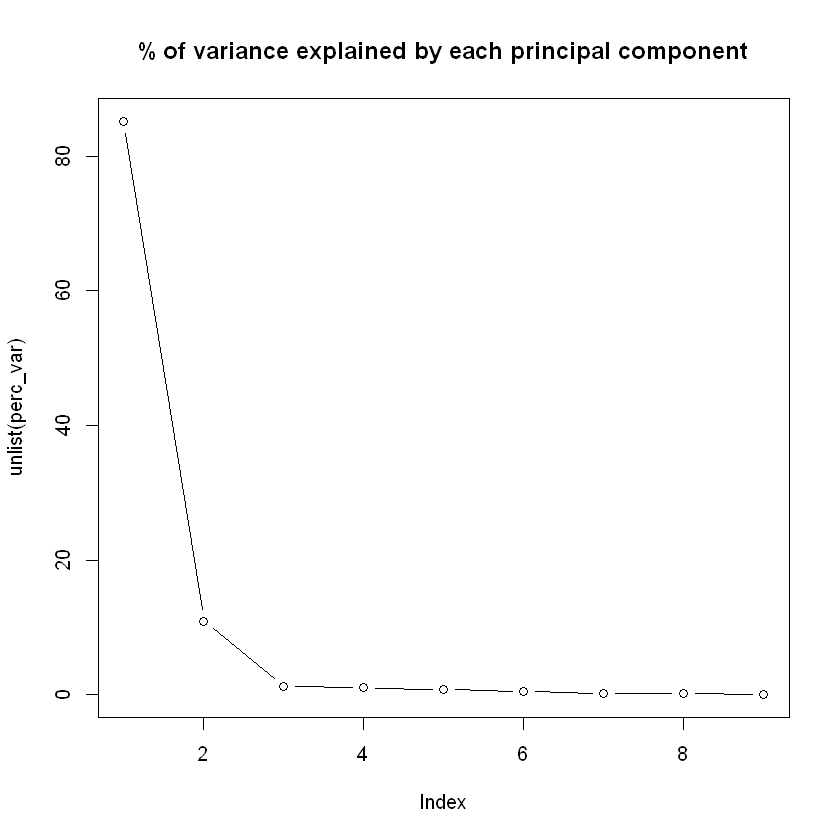

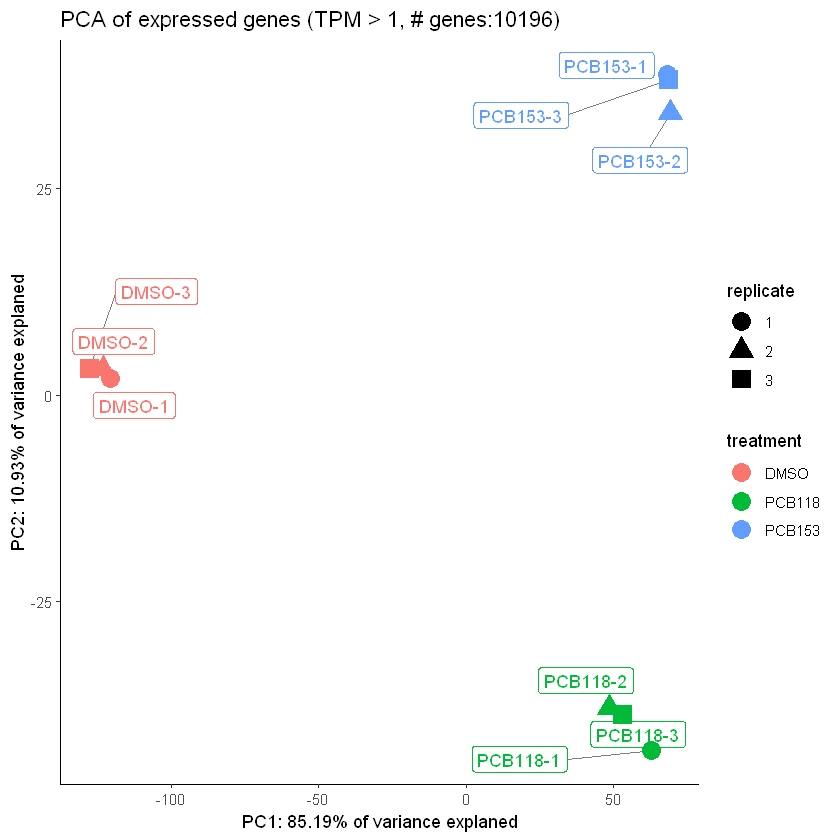

In [11]:
## PCA using log transformed TPM values of expressed genes
# generate a matrix with TPM values of expressed genes
ma <- as.matrix(df[df$is_exp == 1, cols_tpm])

# standardize data (mean = 0, variance = 1)
ma_s <- scale(ma)

# make PCA using prcomp
ma_pca <- prcomp(t(ma_s), center = TRUE, scale. = TRUE) # center to zero, scale according to unit variance

# calculated percentage of variance explained by PCs (sd is sqr of variance)
perc_var <- lapply(seq_along(ma_pca$sdev), function(i){
  perc <- round(ma_pca$sdev[i]^2 / sum((ma_pca$sdev)^2)*100, 2)
  return(perc)
}
)

# plot % variances of each principal component
plot(unlist(perc_var), type = "b")+
  title(main = "% of variance explained by each principal component")

# make data.frame with PC scores and sample labels
df_pca <- as.data.frame(ma_pca$x)
df_pca$treatment <- gsub("[.].*", "", gsub("TPM_HEPG2_RNAseq_", "", row.names(ma_pca$x)))
df_pca$replicate <- gsub(".*rep", "", row.names(ma_pca$x))
df_pca$label <- paste0(df_pca$treatment, "-", df_pca$replicate)

# plot PC1 vs PC2
# pdf(paste0(home_dir,"/PCA_of_exp_genes_TPM",round(cutoff_tpm, 3),".pdf"), width = 9, height = 8)
ggplot(df_pca, aes(x = PC1, 
                   y = PC2, 
                   color = treatment, 
                   label = label, 
                   shape = replicate))+
  theme_classic()+
  labs(title = paste0("PCA of expressed genes (TPM > ", cutoff_tpm, ", # genes:", dim(ma)[1], ")"),
       x = paste0("PC1: ", perc_var[1],"% of variance explaned"), 
       y = paste0("PC2: ", perc_var[2],"% of variance explaned"))+
  geom_label_repel(aes(label = label),
                   box.padding   = 0.5,
                   point.padding = 0.5,
                   max.overlaps = 10,
                   segment.color = 'grey50') +
  geom_point(size = 5)
# dev.off()

In [12]:
# exercise: copy and modify the above code to plot next principal components: PC3 and PC4

## 5. Volcano-plot
A common way to visualize DGE data is volcano-plot, where logFC and -log10(p-value) are plotted. Plotting -log(p-value) instead of p-value is a common trick in visualizations. The -log transformation emphasizes small p-values (close to 0) by transforming them to large values while large p-values (close to 1) are transformed to small values.  
Let's make one volcano-plot next :) In this case we first save the image to an R object first before drawing it (`p1 <- ggplot(...)`). One advantage of this is that we can later show several images in a grid. 

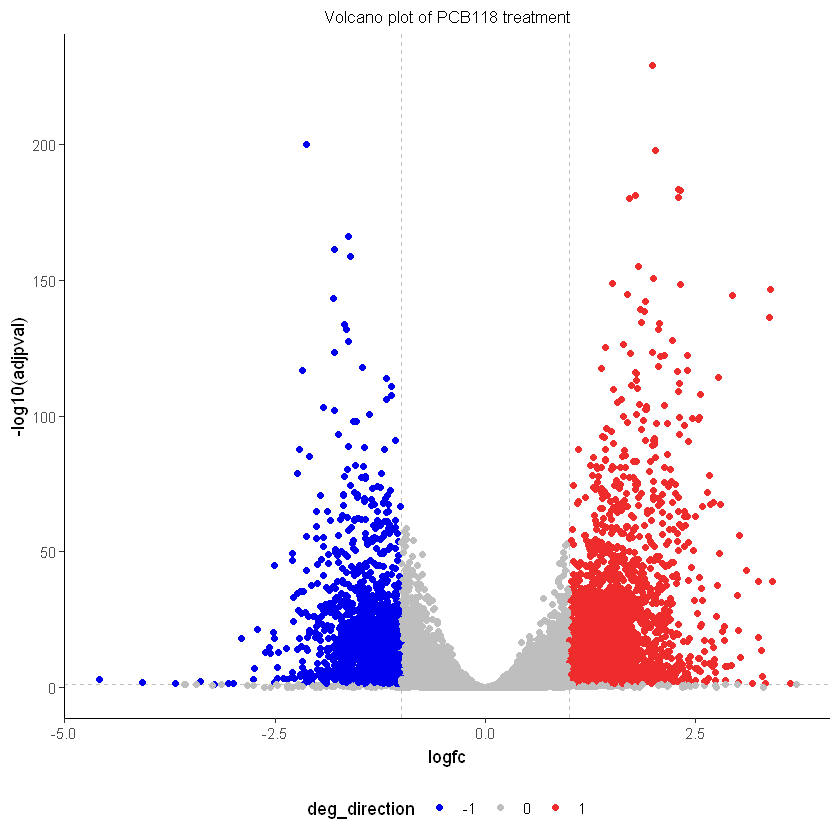

In [13]:
## volcano plots from expressed genes

## PCB118 volcano plot
# colnames(df) # check how columns are named
# subset PCB118 logFC and adj. p-value columns of expressed genes
vp <- df[df$is_exp == 1, 
         c("symbol",
           "DMSO.50nM_vs_PCB118.50microM_Log2_Fold_Change",
           "DMSO.50nM_vs_PCB118.50microM_adj_pvalue",
           "PCB118_up",
           "PCB118_dn")]

#simplify column names
colnames(vp) <- c("symbol", "logfc", "adjpval", "up", "dn")

# make one column for the direction of change (1 is up and -1 is down)
vp$deg_direction <- as.factor(vp$up - vp$dn)

# remove NAs
vp <- na.omit(vp)

## make volcano plot
# pdf(file = paste0(home_dir, "/volcano_plot_PCB118.pdf"))
p1 <- ggplot(vp, aes(x = logfc, y = -log10(adjpval)))+
  theme_classic()+
  theme(legend.position = "bottom", plot.title = element_text(hjust = 0.5, size = 10))+
  geom_vline(xintercept = cutoff_logfc, lty = 2, color = "gray")+
  geom_vline(xintercept = -cutoff_logfc, lty = 2, color = "gray")+
  geom_hline(yintercept = -log10(cutoff_adjpval), lty = 2, color = "gray")+
  geom_point(aes(col = deg_direction))+
  labs(title = "Volcano plot of PCB118 treatment")+
  scale_color_manual(values=c("blue2", "gray", "firebrick2"))
p1
# dev.off()

In [14]:
## PCB153 volcano plot
# copy and modify above code to generate this plot :)
#vp2 <- ...

#p2 <- ...

## show several plots as a grid
# pdf(paste0(home_dir, "/figures/HEPG2_volcanos.pdf"))

# show both volcano-plots (p1 and p2) in one figure
#do.call(grid.arrange, list(p1, p2))

# dev.off()


## 6. Heat map of DEGs
Perhaps the most common visualization of RNA-seq data analysis is the heat map. In heatmap, each row represents one gene and each column one sample, while colors indicate expression level. Gene expression varies a lot from gene to gene, and therefore it is a good idea to use **[Z-score](https://en.wikipedia.org/wiki/Standard_score)** normalized expression values (each gene will have mean of 0 and variance of 1 with `scale()` function).  
Next, `Heatmap()` function from ComplexHeatmap package is used to plot the heatmap. 

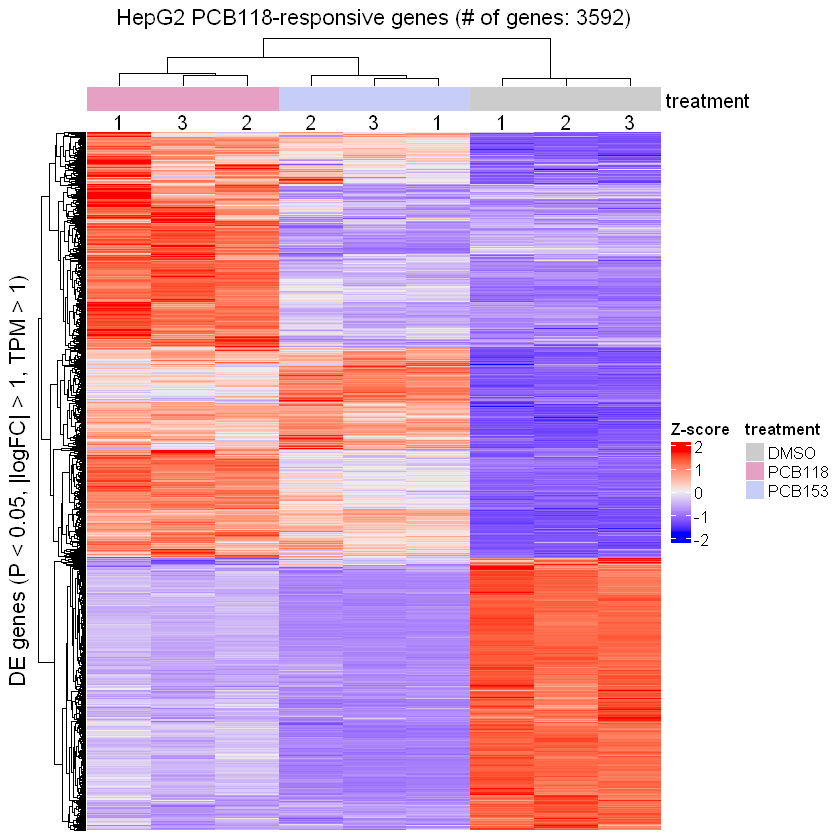

In [15]:
# make dataframe for heatmap annotations
hm_annotations <- data.frame(cols_tpm) 
hm_annotations$group <- gsub("[.].*", "", gsub("TPM_HEPG2_RNAseq_", "", cols_tpm))
hm_annotations$replicate <- gsub(".*rep", "", cols_tpm)

# define group colors for consistent coloring
# hm_group_cols <- c("gray80", wes_palette("GrandBudapest2")[1:2])
hm_group_cols <- c("gray80",  "#E6A0C4", "#C6CDF7")
names(hm_group_cols) <- unique(hm_annotations$group)


### PCB118 heatmap
## extract TPM columns of expressed, PCB118 induced or repressed genes as a matrix
hm <- as.matrix(df[(df$PCB118_up == 1 | df$PCB118_dn == 1) & df$is_exp == 1, cols_tpm])
# colnames(hm)

# Z-score scaling of data (mean = 0, variance = 1)
hm_s <- t(apply(hm, 1, scale))

# draw heatmap with annotations
# pdf(paste0(home_dir, "/HepG2_DEG_hm_TPM",round(cutoff_tpm, 3),"_pval"cutoff_adjpval,"_logFC",cutoff_logfc,".pdf"))
Heatmap(hm_s,
        show_row_names = FALSE,
        name = "Z-score",
        column_title = paste0("HepG2 PCB118-responsive genes (# of genes: ", dim(hm_s)[1],")"),
        row_title = paste0("DE genes (P < ", cutoff_adjpval, ", |logFC| > ", cutoff_logfc, 
                           ", TPM > ", round(cutoff_tpm, 3),")"),
        
        top_annotation = HeatmapAnnotation(group = hm_annotations$group, 
                                           rep = anno_text(hm_annotations$replicate, rot = 0, just = 0.5, location = 0.4), 
                                           col = list(group = hm_group_cols),
                                           annotation_label = c("treatment", "replicate"))
)
# dev.off()


In [16]:
## PCB153 heatmap
# copy and modify the above code to make heat map for PCB153 DEGs


## 7. UpSet plot
Venn-diagrams are a common way to compare similarities of sets. However, they only work to three (or so) samples. An alternative is an **[UpSet plot](https://en.wikipedia.org/wiki/UpSet_plot)** that can be a powerful way to compare multiple datasets.  
Let's use `make_comb_mat()` and `UpSet()` functions to make an UpSet plot that compares all DEG categories against each other.

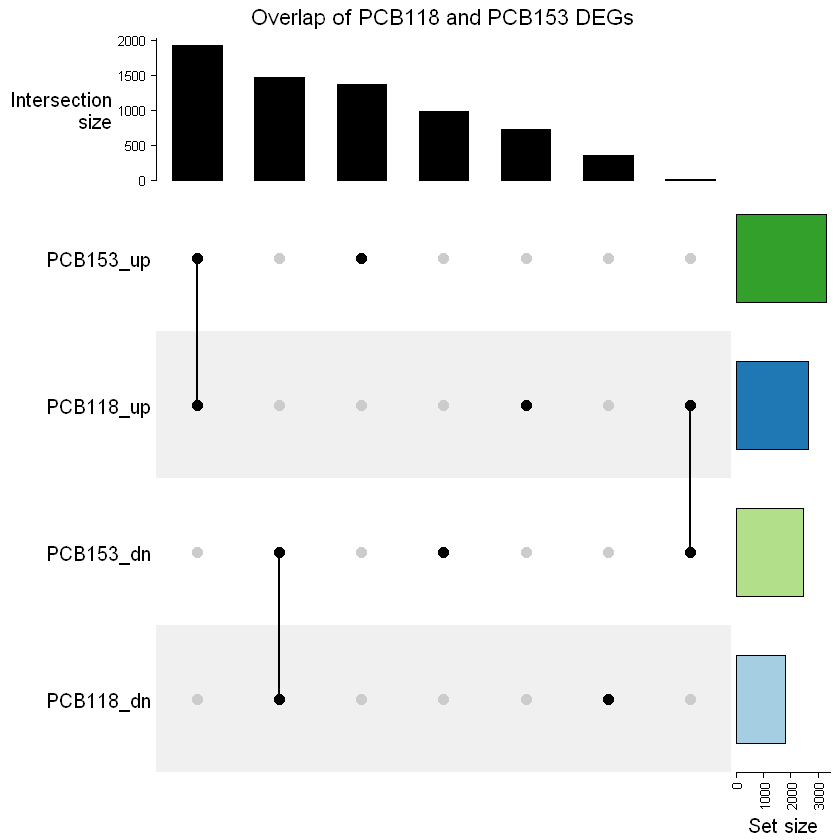

In [17]:
## column vector for induced (_up) or repressed (_dn) genes
cols_upset <- grep("_up|_dn", colnames(df), value = TRUE)

# make "up" data frame 
up <- df[, cols_upset]
up <- up[rowSums(up) >0, ] # keep only non-zero columns
# head(up)

# make a combination matrix for visualization
up_cm <- make_comb_mat(up, mode = "distinct") 
# up_cm

# select colors for DEG categories
up_colors <- c("#1F78B4", "#A6CEE3", "#33A02C","#B2DF8A")

# pdf(paste0(home_dir, "/HepG2_DEG_upSet.pdf"), height = 5, width = 7)
UpSet(up_cm, 
      comb_order = order(-comb_size(up_cm)), 
      right_annotation = upset_right_annotation(up_cm, gp = gpar(fill = up_colors)),
      column_title = paste0("Overlap of PCB118 and PCB153 DEGs"))
# dev.off()

In [18]:
# let's save the df as an R object for tomorrow!
saveRDS(df, paste0(home_dir, "/../Day2_GSEA_Lisa/df.rds"))

## END OF DAY 1 
That's it for the day one :) 